Script used to create the necessary graphical and analytical tools that will allow to study the distribution of the returns obtained from the different portfolios generated.

# Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest
import os

# Load the dataset

In [32]:
path = os.path.join("data", 'portfolio_metrics.csv')
return_df = pd.read_csv(path, sep=',')
#return_df = return_df.drop('Unnamed: 0', axis=1)
return_df.head()

,ST,CB,PB,GO,CA,RETURN,VOLATILITY
0,1.0,0.0,0.0,0.0,0.0,5.133871,7.801798
1,0.8,0.2,0.0,0.0,0.0,4.890804,6.279299
2,0.8,0.0,0.2,0.0,0.0,4.151317,5.931652
3,0.8,0.0,0.0,0.2,0.0,8.887924,6.741445
4,0.8,0.0,0.0,0.0,0.2,2.095097,5.854364


# Raw data histogram

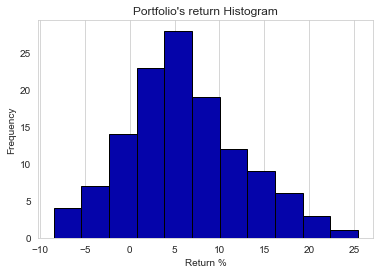

In [33]:
n, bins, patches = plt.hist(x=return_df['RETURN'], bins='auto', color='#0504aa', align='right', edgecolor='black')
plt.grid(axis='y')
plt.xlabel('Return %')
plt.ylabel('Frequency')
plt.title("Portfolio's return Histogram")
maxfreq = n.max()
plt.show()

# Distribution plot

Text(0.5, 0, 'Return %')

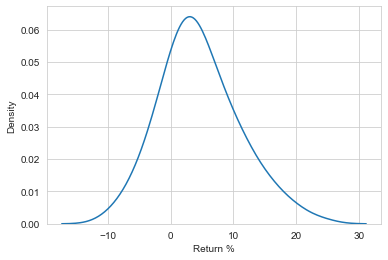

In [34]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(return_df['RETURN']))
plt.xlabel('Return %')

# Probability plot

<AxesSubplot:xlabel='Return %', ylabel='Probability'>

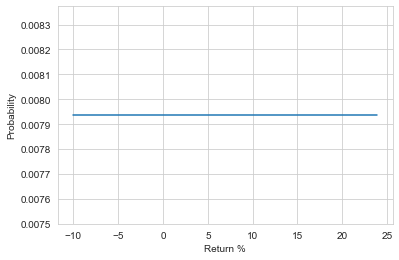

In [35]:
return_df_probs = return_df.groupby('RETURN').size().div(len(return_df))
return_df_probs.plot(xlabel='Return %', ylabel='Probability')

# Box plot

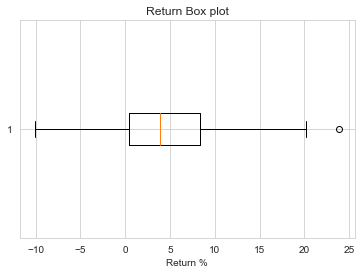

In [36]:
plt.boxplot(return_df['RETURN'], vert=False)
plt.title('Return Box plot')
plt.xlabel('Return %')
plt.show()

# Distribution test: normaltest

In [37]:
stat, p_val = normaltest(return_df['RETURN'])
print(f'Normaltest p-value: {p_val}')

Normaltest p-value: 0.10885618183211522
